In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data

In [33]:
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [34]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Rescale the data so that the values in the dataset range from 0 to 1

In [35]:
def scale_mnist_data(train_images, test_images):
    return train_images / 255, test_images/255

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

Add dummy channel dimensions

In [36]:
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

### Build the model

In [61]:
def get_model(input_shape):    
    model = Sequential([
        Conv2D(8, (3,3), padding='same', activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    return model

In [62]:
model = get_model(scaled_train_images[0].shape)

### Compile the Model

In [63]:
def compile_model(model):
    
    return model.compile(optimizer='adam',
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        metrics=['accuracy'])

In [64]:
compile_model(model)

### Fit the model to the training data

In [65]:
def train_model(model, scaled_train_images, train_labels):
    
    history = model.fit(scaled_train_images, train_labels, epochs = 5)
    
    return history

In [66]:
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1855 - accuracy: 0.9446
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0647 - accuracy: 0.9797
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0304 - accuracy: 0.9902
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0228 - accuracy: 0.9926


### Plot the learning curves

In [67]:
frame = pd.DataFrame(history.history)

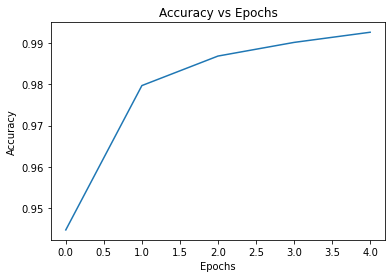

In [68]:
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy");

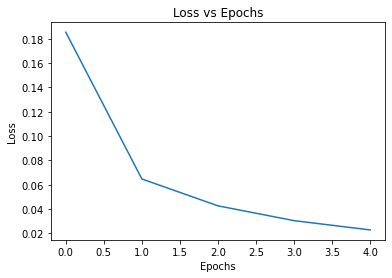

In [69]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss");

### Evaluate the model

In [70]:
def evaluate_model(model, scaled_test_images, test_labels):

    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels)
    
    return test_loss, test_accuracy

In [71]:
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0512 - accuracy: 0.9844
Test loss: 0.05121184140443802
Test accuracy: 0.9843999743461609


### Model Predictions

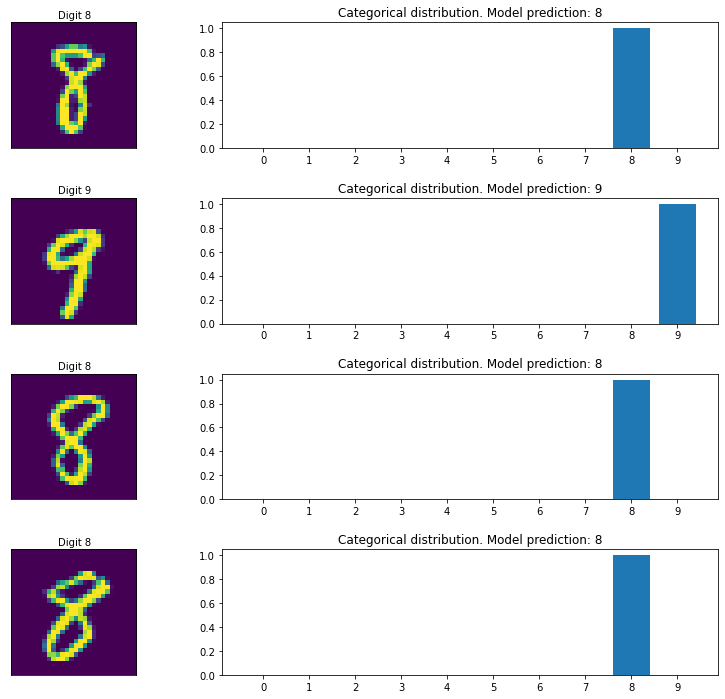

In [72]:
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

In [73]:
scaled_train_images[0].shape

(28, 28, 1)